**This notebook is used to present descriptive statistics of the performance metrics and parameter distributions of d-HyMoLAP on both CAMELS-FR and CAMELS-GB datasets.**

In [13]:
# ============================================================
# 0. LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from pathlib import Path
import os
import seaborn as sns
from scipy.stats import spearmanr

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.grid": True
})

In [14]:
# ============================================================
# 1. MOUNT DRIVE & FILE DEFINITIONS
# ============================================================
drive.mount("/content/drive")

DATA_DIR = Path("/content/drive/MyDrive/Colab Notebooks/Data")

FILES = {
    "FR_HyMoLAP": "HyMoLAP_Simulation_Data_CAMELS_FR.csv",
    "FR_d-HyMoLAP": "dHyMoLAP_Simulation_Data_CAMELS_FR.csv",
    "GB_HyMoLAP": "HyMoLAP_Simulation_Data_CAMELS_GB.csv",
    "GB_d-HyMoLAP": "dHyMoLAP_Simulation_Data_CAMELS_GB.csv",
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# ============================================================
# 1. DATA LOADING
# ============================================================

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Data"

def load_and_standardize(path):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]

    # Normalize column names
    rename_map = {
        "MU": "mu",
        "LAMBDA": "lambda",
        "Qs": "Qs",
        "qs": "qs",
        "NSE_train": "NSE_train",
        "NSE_val": "NSE_val",
        "RMSE_train": "RMSE_train",
        "RMSE_val": "RMSE_val",
    }
    df = df.rename(columns=rename_map)

    return df

data = {k: load_and_standardize(os.path.join(BASE_PATH, v)) for k, v in FILES.items()}

In [16]:
# ============================================================
# 2. BASIC STATISTICS + HISTOGRAMS
# ============================================================
def describe_nse_val(df, label):
    print(f"\n===== {label} =====")
    print(df["NSE_val"].describe(percentiles=[.05,.5,.95]))

def describe_nse_train(df, label):
    print(f"\n===== {label} =====")
    print(df["NSE_train"].describe(percentiles=[.05,.5,.95]))

print("Performance at training:")
for k, df in data.items():
    describe_nse_train(df, k)

print("Performance at training:")
for k, df in data.items():
    describe_nse_val(df, k)

Performance at training:

===== FR_HyMoLAP =====
count    549.000000
mean       0.330429
std        1.078534
min      -20.805362
5%        -0.454476
50%        0.556657
95%        0.751980
max        0.861562
Name: NSE_train, dtype: float64

===== FR_d-HyMoLAP =====
count    549.000000
mean       0.637253
std        0.114620
min        0.047000
5%         0.450200
50%        0.643000
95%        0.809000
max        0.877000
Name: NSE_train, dtype: float64

===== GB_HyMoLAP =====
count    623.000000
mean      -0.740187
std       11.150405
min     -226.471766
5%        -1.653155
50%        0.484611
95%        0.752473
max        0.843623
Name: NSE_train, dtype: float64

===== GB_d-HyMoLAP =====
count    623.000000
mean       0.702227
std        0.092527
min        0.032881
5%         0.531082
50%        0.718393
95%        0.822408
max        0.887873
Name: NSE_train, dtype: float64
Performance at training:

===== FR_HyMoLAP =====
count    549.000000
mean       0.236115
std        1.73087

In [17]:
def describe_rmse_val(df, label):
    print(f"\n===== {label} =====")
    print(df["RMSE_val"].describe(percentiles=[.05,.5,.95]))

def describe_rmse_train(df, label):
    print(f"\n===== {label} =====")
    print(df["RMSE_train"].describe(percentiles=[.05,.5,.95]))

print("Performance at training:")
for k, df in data.items():
    describe_rmse_train(df, k)

print("Performance at training:")
for k, df in data.items():
    describe_rmse_val(df, k)

Performance at training:

===== FR_HyMoLAP =====
count    549.000000
mean       6.198962
std       27.209455
min        0.354905
5%         0.538704
50%        1.902575
95%       19.561864
max      583.187132
Name: RMSE_train, dtype: float64

===== FR_d-HyMoLAP =====
count    549.000000
mean       5.030015
std       16.746540
min        0.088000
5%         0.253200
50%        1.823000
95%       17.722400
max      339.923000
Name: RMSE_train, dtype: float64

===== GB_HyMoLAP =====
count    623.000000
mean       6.440064
std       12.066044
min        0.329519
5%         0.451552
50%        2.064436
95%       28.250393
max      135.936263
Name: RMSE_train, dtype: float64

===== GB_d-HyMoLAP =====
count    623.000000
mean       4.822388
std        7.978328
min        0.017159
5%         0.139733
50%        1.684355
95%       21.962011
max       74.798638
Name: RMSE_train, dtype: float64
Performance at training:

===== FR_HyMoLAP =====
count    549.000000
mean       5.835167
std       22.0

In [18]:
FILES_1 = {
    "FR_HyMoLAP": "HyMoLAP_Simulation_Data_CAMELS_FR.csv",
    "FR_d-HyMoLAP": "dHyMoLAP_Simulation_Data_CAMELS_FR.csv",
    "GB_HyMoLAP": "HyMoLAP_Simulation_Data_CAMELS_GB.csv",
    "GB_d-HyMoLAP": "dHyMoLAP_Simulation_Data_CAMELS_GB.csv",
    }

data_1 = {k: load_and_standardize(os.path.join(BASE_PATH, v)) for k, v in FILES_1.items()}

In [19]:
# ============================================================
# PARAMETER QUANTILE STATISTICS BY REGION
# ============================================================

PARAMS = ["mu", "lambda", "Qs", "qs"]
QUANTILES = [0.05, 0.25, 0.50, 0.75, 0.95]
REGIONS = ["FR", "GB"]

def parameter_statistics_by_region(data_dict):
    for region in REGIONS:
        print("\n" + "="*70)
        print(f"PARAMETER STATISTICS — REGION: {region}")
        print("="*70)

        # Collect all datasets for this region
        region_dfs = [
            df for name, df in data_dict.items()
            if name.startswith(region)
        ]

        if len(region_dfs) == 0:
            print("No data available.")
            continue

        # Concatenate datasets for this region
        region_data = pd.concat(region_dfs, axis=0, ignore_index=True)

        stats = {}

        for p in PARAMS:
            if p in region_data.columns:
                stats[p] = region_data[p].dropna().quantile(QUANTILES)

        if len(stats) == 0:
            print("No parameters found.")
            continue

        # Format as table
        stats_df = pd.DataFrame(stats)
        stats_df.index = [f"{int(q*100)}%" for q in QUANTILES]

        print(stats_df.round(3))
        print("\nNumber of catchments used:")
        print(region_data[PARAMS].count())

# ============================================================
# RUN
# ============================================================

parameter_statistics_by_region(data_1)


PARAMETER STATISTICS — REGION: FR
         mu   lambda      Qs     qs
5%    0.986    8.156   0.000  0.000
25%   1.064   21.316   0.000  0.001
50%   1.192   32.528   0.024  0.151
75%   1.407   49.490   0.542  1.109
95%  16.307  174.764  17.436  6.422

Number of catchments used:
mu        1098
lambda    1098
Qs         549
qs         549
dtype: int64

PARAMETER STATISTICS — REGION: GB
         mu   lambda     Qs     qs
5%    0.996    7.187  0.000  0.000
25%   1.100   23.429  0.000  0.001
50%   1.218   37.712  0.002  0.040
75%   1.458   65.247  0.238  0.441
95%  74.580  346.450  6.696  7.015

Number of catchments used:
mu        1246
lambda    1246
Qs         623
qs         623
dtype: int64


len(df1)= 549
len(df2)= 549
len(m)= 549
len(df1)= 623
len(df2)= 623
len(m)= 623


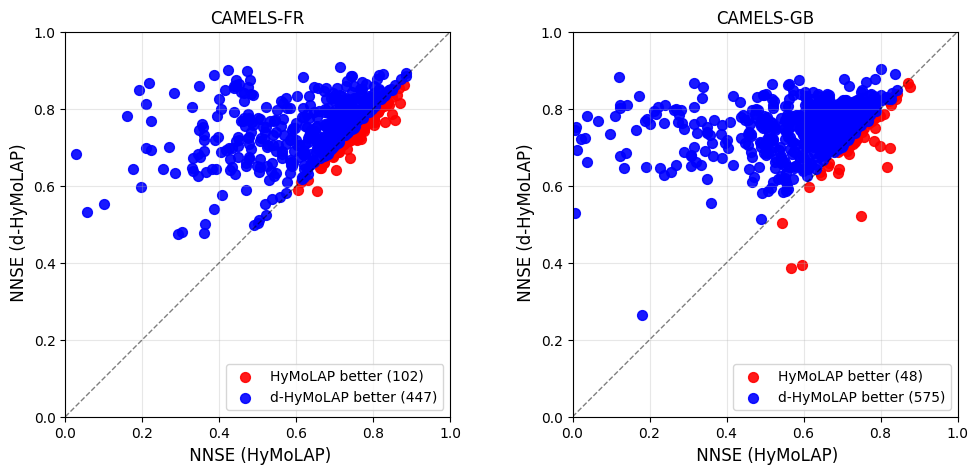

In [20]:
# ============================================================
# 5. SCATTER NNSE COMPARISON (BISECTRICE) - SUBPLOT
# ============================================================

def compute_nnse(nse):
    """Compute Normalized NSE from NSE"""
    return 1.0 / (2.0 - nse)

def scatter_compare_nnse_subplot(ax, df1, df2, title, color1='blue', color2='red'):
    """
    Create scatter plot comparing NNSE of two models on given axis

    Parameters:
    -----------
    ax : matplotlib axis
        Axis to plot on
    df1, df2 : DataFrames
        DataFrames containing NSE values with 'station_id' and 'NSE_val' columns
    title : str
        Plot title
    color1 : str
        Color for points where df1 is better (default: blue)
    color2 : str
        Color for points where df2 is better (default: red)
    """
    # Merge data
    print('len(df1)=', len(df1))
    print('len(df2)=', len(df2))
    m = df1.merge(df2, on="station_id", suffixes=("_A", "_B"))
    print('len(m)=', len(m))

    # Compute NNSE
    m["NNSE_A"] = compute_nnse(m["NSE_val_A"])
    m["NNSE_B"] = compute_nnse(m["NSE_val_B"])

    # Identify which model is better
    df2_better = m["NNSE_B"] > m["NNSE_A"]
    df1_better = ~df2_better

    # Plot points
    ax.scatter(
        m.loc[df1_better, "NNSE_A"],
        m.loc[df1_better, "NNSE_B"],
        c=color1,
        alpha=0.9,
        s=50,
        label=f"HyMoLAP better ({df1_better.sum()})"
    )
    ax.scatter(
        m.loc[df2_better, "NNSE_A"],
        m.loc[df2_better, "NNSE_B"],
        c=color2,
        alpha=0.9,
        s=50,
        label=f"d-HyMoLAP better ({df2_better.sum()})"
    )

    # Plot bisector line
    lims = [0, 1]
    ax.plot(lims, lims, "--k", linewidth=1, alpha=0.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Labels and formatting
    ax.set_xlabel(" NNSE (HyMoLAP)", fontsize=12)
    ax.set_ylabel(" NNSE (d-HyMoLAP)", fontsize=12)
    ax.set_title(title)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Example call 1 - France comparison
scatter_compare_nnse_subplot(
    axes[0],
    data["FR_HyMoLAP"],
    data["FR_d-HyMoLAP"],
    "CAMELS-FR",
    color1= 'red',
    color2= 'blue'
)
# Example call 2 - Great Britain comparison
scatter_compare_nnse_subplot(
    axes[1],
    data["GB_HyMoLAP"],
    data["GB_d-HyMoLAP"],
    "CAMELS-GB",
    color1= 'red',
    color2= 'blue'
)
plt.savefig("Scatter_plot_nnse.pdf", bbox_inches='tight', format='pdf')

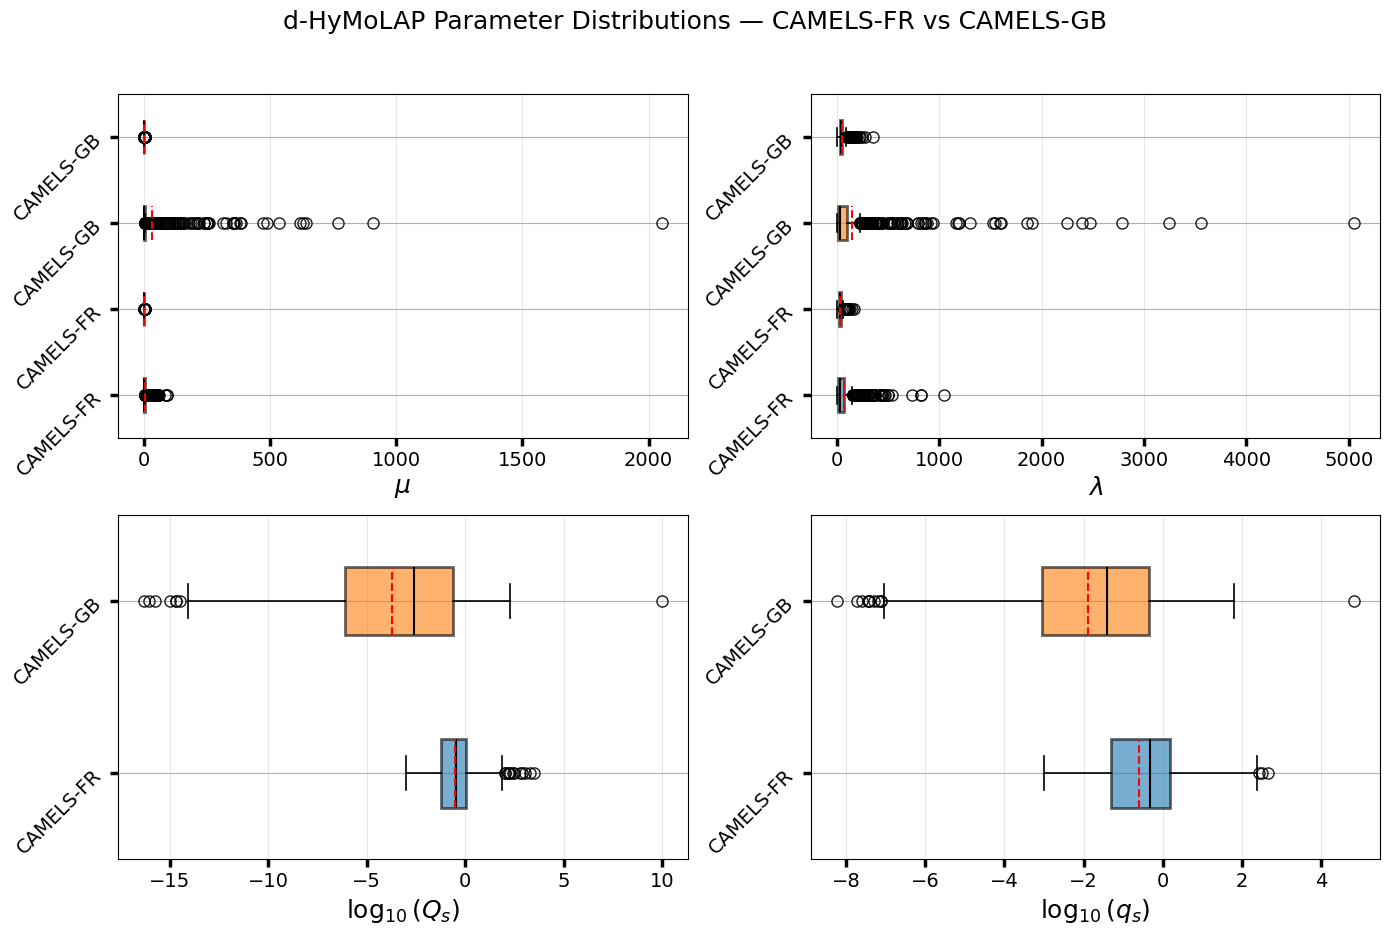

In [21]:
# 1. Define a mapping for parameter names to LaTeX symbols
PARAM_LABELS = {
    "mu": r"$\mu$",
    "lambda": r"$\lambda$",
    "Qs": r"$\log_{10}(Q_s)$",
    "qs": r"$\log_{10}(q_s)$"
}

PARAMS = ["mu", "lambda", "Qs", "qs"]
REGIONS = ["FR", "GB"]
REGION_COLORS = {"FR": "#1f77b4", "GB": "#ff7f0e"}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, param in enumerate(PARAMS):
    ax = axes[i]
    data_to_plot = []
    y_labels = []
    colors = []

    for region in REGIONS:
        for model, df in data_1.items():
            if region in model and param in df.columns:
                # Apply log10 transformation for Qs and qs
                if param in ["Qs", "qs"]:
                    # Filter out zeros and negative values before log transform
                    param_data = df[param].dropna()
                    param_data = param_data[param_data > 0]
                    param_data = np.log10(param_data)
                else:
                    param_data = df[param].dropna()

                data_to_plot.append(param_data)
                y_labels.append(f"CAMELS-{region}")
                colors.append(REGION_COLORS[region])

    if len(data_to_plot) > 0:
        bp = ax.boxplot(
            data_to_plot,
            vert=False,
            patch_artist=True,
            showmeans=True,
            meanline=True,
            widths=0.4,
            boxprops=dict(linewidth=2),
            medianprops=dict(color="black", linewidth=1.5),
            meanprops=dict(color="red", linewidth=1.5),
            whiskerprops=dict(linewidth=1.2),
            capprops=dict(linewidth=1.2),
            flierprops=dict(marker="o", markersize=8, alpha=0.9)
        )

        for patch, color in zip(bp["boxes"], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)

        # Set the number of ticks
        ax.set_yticks(np.arange(1, len(y_labels) + 1))
        ax.set_yticklabels(y_labels)

        # --- IMPROVE SIZE OF GRADUATIONS (TICKS) ---
        ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=2.5)

        # Specific formatting for Y-axis if you want rotation
        ax.set_yticklabels(y_labels, rotation=45, fontsize=14)

        # 2. Apply the LaTeX label to the x-axis with larger font
        ax.set_xlabel(PARAM_LABELS.get(param, param), fontsize=18, fontweight='bold')
        ax.grid(axis="x", alpha=0.3)

plt.suptitle("d-HyMoLAP Parameter Distributions — CAMELS-FR vs CAMELS-GB", fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("Boxplot_Parameters_nnse.pdf", bbox_inches='tight')
plt.show()

In [22]:
import pandas as pd
import numpy as np

# ============================================================
# NSE CLASSIFICATION UTILITIES
# ============================================================

NSE_BINS = [-np.inf, 0.50, 0.70, 0.80, 1.00]
NSE_LABELS = ["Unsatisfactory", "Satisfactory", "Good", "Very Good"]

def classify_nse(df):
    return pd.cut(df["NSE_val"], bins=NSE_BINS, labels=NSE_LABELS, include_lowest=True)

def nse_class_stats(df):
    classes = classify_nse(df)
    counts = classes.value_counts().reindex(NSE_LABELS, fill_value=0)
    percentages = 100 * counts / counts.sum()

    return pd.DataFrame({
        "Count": counts,
        "Percentage (%)": percentages.round(2)
    })

# ============================================================
# 6A. NSE CLASSIFICATION TABLES PER MODEL
# ============================================================

nse_tables = {}

for name, df in data.items():
    table = nse_class_stats(df)
    nse_tables[name] = table

    print(f"\n=== {name} ===")
    print(table)


=== FR_HyMoLAP ===
                Count  Percentage (%)
NSE_val                              
Unsatisfactory    228           41.53
Satisfactory      212           38.62
Good               87           15.85
Very Good          22            4.01

=== FR_d-HyMoLAP ===
                Count  Percentage (%)
NSE_val                              
Unsatisfactory     68           12.39
Satisfactory      246           44.81
Good              170           30.97
Very Good          65           11.84

=== GB_HyMoLAP ===
                Count  Percentage (%)
NSE_val                              
Unsatisfactory    370           59.39
Satisfactory      205           32.91
Good               40            6.42
Very Good           8            1.28

=== GB_d-HyMoLAP ===
                Count  Percentage (%)
NSE_val                              
Unsatisfactory     67           10.75
Satisfactory      284           45.59
Good              237           38.04
Very Good          35            5.62
